In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import tensorflow as tf

In [42]:
fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data() 

In [43]:
print(f'Shape of the training data: {x_train.shape}')
print(f'Shape of the training target: {y_train.shape}')
print(f'Shape of the test data: {x_test.shape}')
print(f'Shape of the test target: {y_test.shape}')

Shape of the training data: (60000, 28, 28)
Shape of the training target: (60000,)
Shape of the test data: (10000, 28, 28)
Shape of the test target: (10000,)


In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [45]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

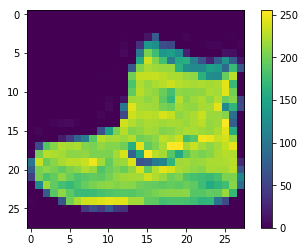

In [46]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
# x_train = x_train / 255.0
# x_test = x_test/ 255.0
# print(x_train.shape)
# print(x_test.shape)

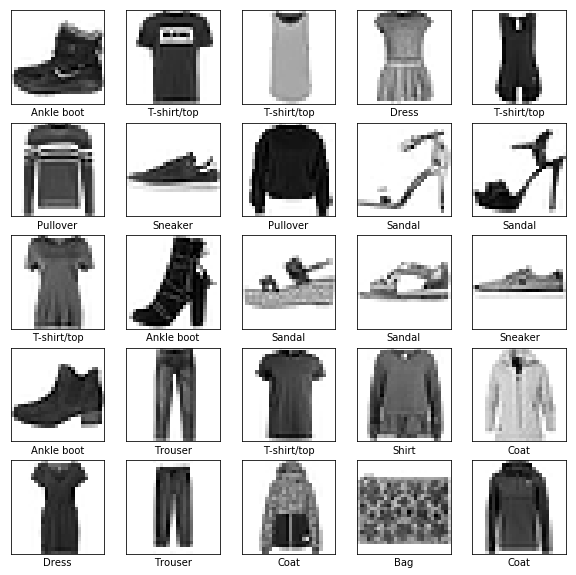

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.utils import to_categorical

In [50]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Label size {y_train.shape}")
print(f"Label size {y_test.shape}")

Label size (60000, 10)
Label size (10000, 10)


In [51]:
print(y_train[0])
print(y_train[0].argmax())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


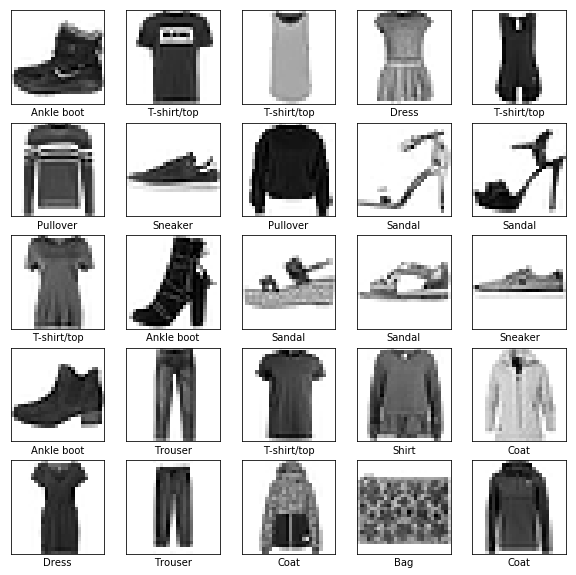

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()


In [53]:
# Reshaping the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Normalizing
x_train = x_train/255
x_test = x_test/255

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


#### Build the model

In [54]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu',padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
history = model.fit(x_train,y_train, 
                    epochs = 10, batch_size=64,
                    validation_data = (x_test,y_test),
                    verbose=1)

Epoch 1/10
938/938 [==============================] - 135s 144ms/step - loss: 0.6363 - accuracy: 0.7655 - val_loss: 0.3979 - val_accuracy: 0.8497
Epoch 2/10
938/938 [==============================] - 128s 136ms/step - loss: 0.3215 - accuracy: 0.8818 - val_loss: 0.2859 - val_accuracy: 0.8974
Epoch 3/10
938/938 [==============================] - 130s 139ms/step - loss: 0.2738 - accuracy: 0.8990 - val_loss: 0.2770 - val_accuracy: 0.8980
Epoch 4/10
938/938 [==============================] - 131s 140ms/step - loss: 0.2371 - accuracy: 0.9110 - val_loss: 0.2512 - val_accuracy: 0.9084
Epoch 5/10
938/938 [==============================] - 133s 141ms/step - loss: 0.2211 - accuracy: 0.9178 - val_loss: 0.2373 - val_accuracy: 0.9100
Epoch 6/10
938/938 [==============================] - 139s 148ms/step - loss: 0.1979 - accuracy: 0.9266 - val_loss: 0.2322 - val_accuracy: 0.9173
Epoch 7/10
938/938 [==============================] - 136s 145ms/step - loss: 0.1839 - accuracy: 0.9319 - val_loss: 0.2323 -

In [74]:
print(history.history)

{'loss': [0.4576408863067627, 0.3107156753540039, 0.26756247878074646, 0.24010400474071503, 0.21851450204849243, 0.2002149373292923, 0.18466056883335114, 0.1706126481294632, 0.15808157622814178, 0.14909745752811432], 'accuracy': [0.8330333232879639, 0.8864833116531372, 0.9017166495323181, 0.9106333255767822, 0.9181333184242249, 0.925849974155426, 0.9308666586875916, 0.9356833100318909, 0.9398833513259888, 0.9441499710083008], 'val_loss': [0.3979461193084717, 0.2859041094779968, 0.27701371908187866, 0.2512110471725464, 0.23734958469867706, 0.23220710456371307, 0.2323087602853775, 0.23363152146339417, 0.2337670624256134, 0.23269155621528625], 'val_accuracy': [0.8496999740600586, 0.8974000215530396, 0.8980000019073486, 0.9083999991416931, 0.9100000262260437, 0.9172999858856201, 0.9156000018119812, 0.9199000000953674, 0.9204999804496765, 0.9221000075340271]}


#### Plot Training and Validation Loss and Accuracy

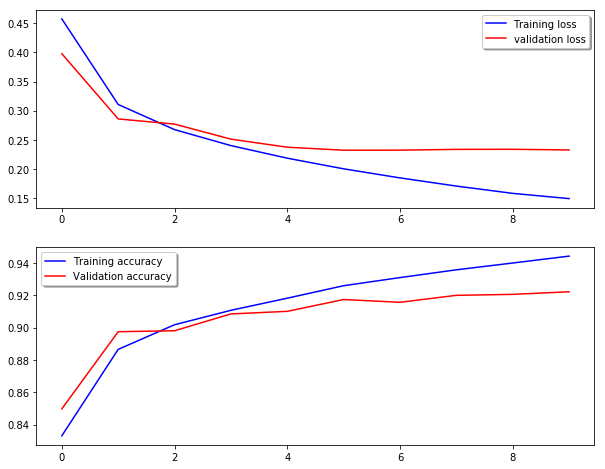

In [56]:
fig, ax = plt.subplots(2,1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#### Making Predictions

In [57]:
y_pred = model.predict(x_test)
y_pred

array([[2.7064205e-11, 8.8747813e-13, 8.8424212e-10, ..., 1.6842543e-05,
        1.7042513e-10, 9.9998128e-01],
       [1.9576615e-05, 5.6718402e-10, 9.9996495e-01, ..., 8.4905319e-11,
        2.3353375e-09, 1.5366922e-10],
       [3.0368483e-08, 9.9999976e-01, 8.3662801e-09, ..., 1.3960302e-16,
        2.5808935e-14, 1.5021456e-15],
       ...,
       [1.3281588e-09, 1.1366678e-12, 3.5377801e-09, ..., 3.8304700e-14,
        1.0000000e+00, 6.8292773e-15],
       [5.4793472e-09, 9.9999988e-01, 2.6321818e-08, ..., 1.0394031e-15,
        2.7461369e-14, 1.6875498e-14],
       [8.0668321e-04, 9.6597760e-05, 4.2812357e-04, ..., 5.6305069e-02,
        2.2172198e-02, 2.8480913e-03]], dtype=float32)

In [59]:
print(y_pred[0])
print(y_pred[0].argmax())
print(class_names)
print(class_names[y_pred[0].argmax()])

[2.7064205e-11 8.8747813e-13 8.8424212e-10 6.3092798e-09 5.4628515e-09
 1.9166750e-06 1.0811976e-09 1.6842543e-05 1.7042513e-10 9.9998128e-01]
9
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Ankle boot


In [60]:
y_pred_labels=[]
print(len(y_pred))
for i in range(len(y_pred)):
    y_pred_labels.append(y_pred[i].argmax())
print(y_pred_labels)

10000
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 2, 6, 4, 4, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 3, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 6, 9, 2, 2, 8, 6, 4, 6, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 6, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 6, 7, 7, 7, 3, 3, 

In [61]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
y_test_labels=[]
print(len(y_test))
for i in range(len(y_test)):
    y_test_labels.append(y_test[i].argmax())
print(y_test_labels)

10000
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 6, 2, 2, 4, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 4, 5, 6, 9, 2, 6, 8, 6, 4, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 4, 2, 4, 9, 1, 6, 4, 8, 2, 6, 5, 4, 6, 7, 7, 7, 3, 3, 

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_labels,y_pred_labels)

array([[900,   0,  10,  14,   2,   1,  67,   0,   6,   0],
       [  2, 989,   1,   3,   1,   0,   3,   0,   1,   0],
       [ 16,   1, 880,   9,  33,   0,  60,   0,   1,   0],
       [ 11,   4,   8, 944,  14,   0,  19,   0,   0,   0],
       [  0,   0,  60,  22, 830,   0,  86,   0,   2,   0],
       [  0,   0,   0,   0,   0, 981,   0,  14,   0,   5],
       [130,   0,  40,  23,  41,   0, 759,   0,   7,   0],
       [  0,   0,   0,   0,   0,   3,   0, 985,   0,  12],
       [  5,   0,   2,   2,   1,   1,   2,   1, 986,   0],
       [  0,   0,   1,   0,   0,   3,   0,  29,   0, 967]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_pred_labels))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.88      0.88      1000
           3       0.93      0.94      0.94      1000
           4       0.90      0.83      0.86      1000
           5       0.99      0.98      0.99      1000
           6       0.76      0.76      0.76      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



#### Plotting Predictions

TypeError: Invalid dimensions for image data

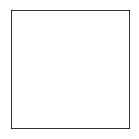

In [65]:
# y_pred = model.predict(x_test)
# test_img = x_test.reshape(x_test.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted - {y_pred[i].argmax()}')
plt.show()

In [66]:
print(x_test.shape)

(10000, 28, 28, 1)


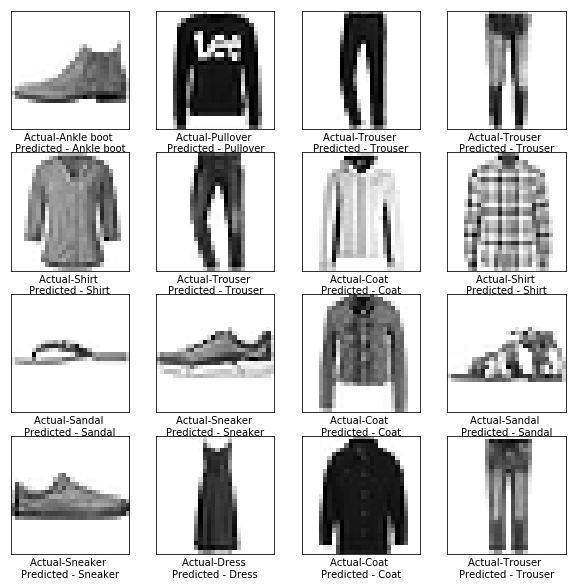

In [69]:
test_img = x_test.reshape(x_test.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual-{class_names[y_test[i].argmax()]} \nPredicted - {class_names[y_pred[i].argmax()]}')
plt.show()